En este notebook lo que haremos será ver patrones y relaciones que tienen las disintas variables entre ellas. Para ello lo primero que haremos ser leer los datos escritos en el notebook anterior.

Montamos drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cargamos las distintas rutas de los archivos

In [2]:
# Cambiar el directorio de trabajo
%cd '/content/drive/My Drive/tfg/tfg/'

# Mostrar el directorio actual para confirmar el cambio
directorio_actual = %pwd
print("Directorio actual:", directorio_actual)

/content/drive/My Drive/tfg/tfg
Directorio actual: /content/drive/My Drive/tfg/tfg


In [3]:
import os
import pandas as pd
path_actual = os.getcwd()
subdirectorio = 'datas'
file_train = 'df_train.csv'
path_train = os.path.join(path_actual, subdirectorio, file_train)


Leemos y metemos en un dataFrame llamado `df_train` los datos que usaremos para train

In [4]:
import pandas as pd

df_train = pd.read_csv(path_train, index_col=None)
df_train

,eventID,PDGcode,trueE,hitX,hitY,hitZ,hitTime,hitInteg
0,1,211,0.381965,13.5922,2.85275,-18.062,1872.38,1655.0600
1,1,211,0.381965,13.8270,2.79629,-17.893,1878.77,340.1960
2,1,211,0.381965,13.6746,2.74496,-17.677,1876.82,4047.6200
3,1,211,0.381965,13.5436,2.71796,-17.580,1878.30,1234.5500
4,1,211,0.381965,13.3256,2.72527,-17.542,1868.97,1394.2800
...,...,...,...,...,...,...,...,...
23001567,19999,321,0.511779,-26.7600,9.41895,45.739,1362.47,1825.6700
23001568,19999,321,0.511779,-26.8500,9.43314,45.757,1358.16,1862.7900
23001569,19999,321,0.511779,-26.8780,9.51059,46.057,1360.96,1586.2400
23001570,19999,321,0.511779,-26.9210,9.52140,46.063,1357.25,388.8380


Mostramos la matriz de correlacion en train

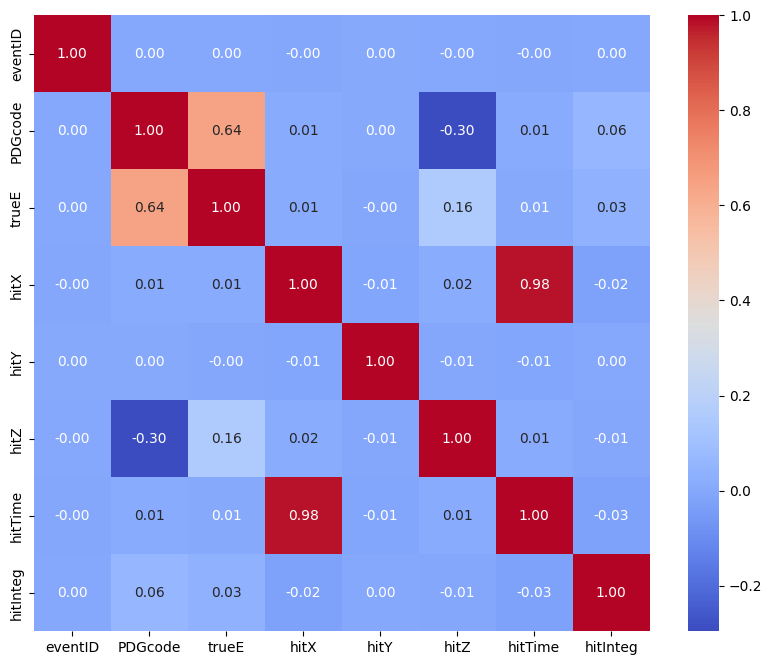

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

matriz_correlacion = df_train.corr()

# Crear un heatmap para visualizar la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Mostrar el gráfico
plt.show()

Como podemos ver en la matriz de correlacion y en el mapa de calor las variables que mas relacion tienen en nuestro caso son las varialbes hitX con hitTime
TODO: EXPLCIAR EL PORQUE

Todas las demás su relación es muy pequeña como en el caso de la variavle PGDcode y hitZ y casi nula como en el resto de relaciones entre variables.

En nuestro caso, en la clasificación que vamos a realizar la vamos hacer a partir de la variable PGCcode, es decir el codigo de particula primaria va a ser nuestro label, por ese motivo nos interesaría que la variable PGCcode tuviera una relación más alta con alguna de las demás variables.

Ahora mostraremos distintos histogramas para conocer las distribuciones de los datos en función de si son kaones o piones.

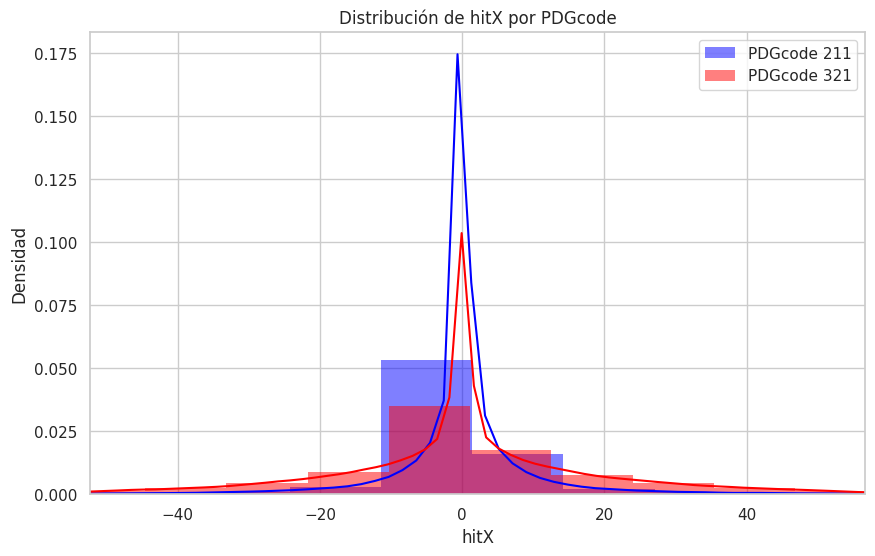

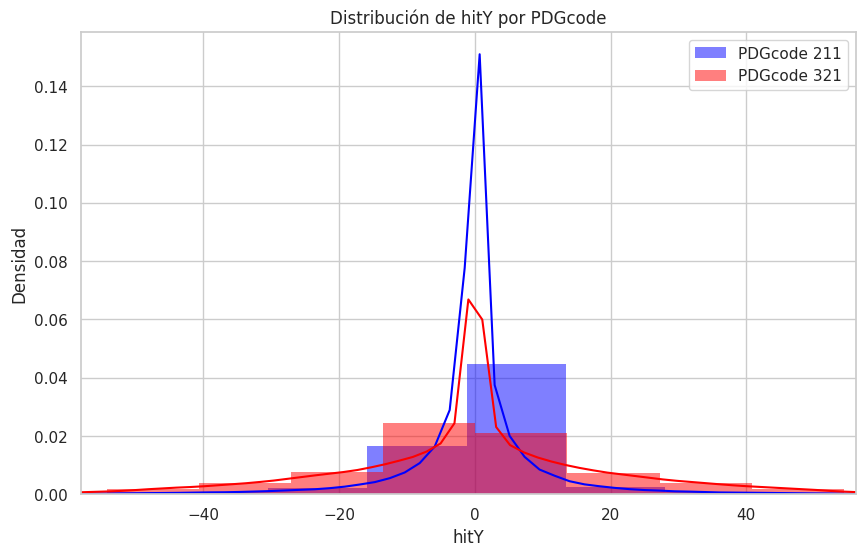

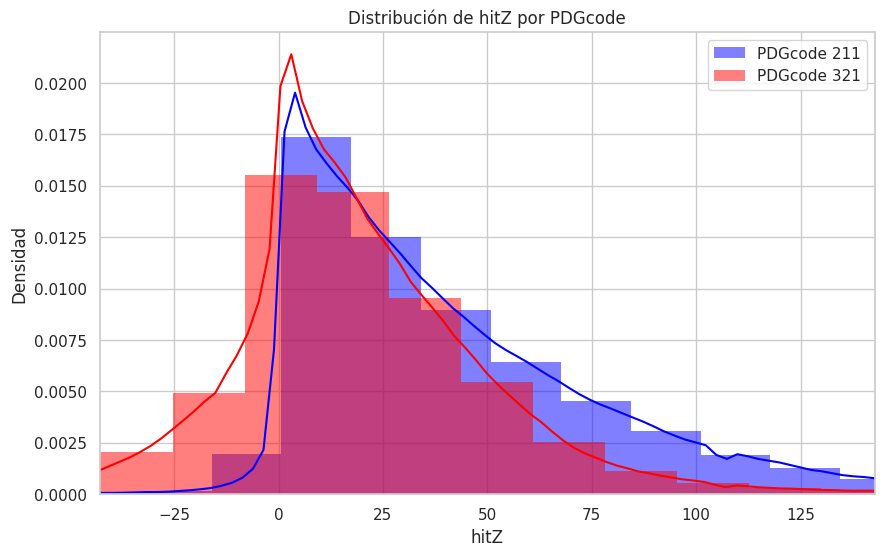

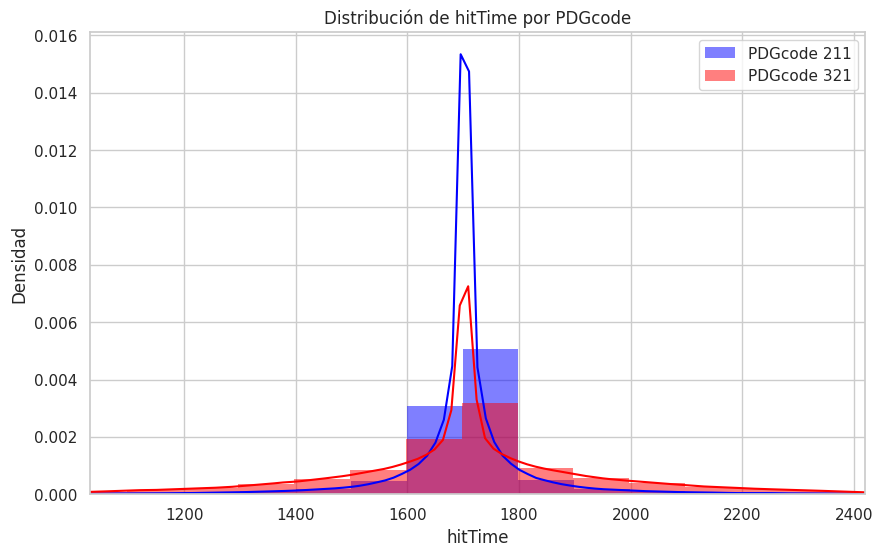

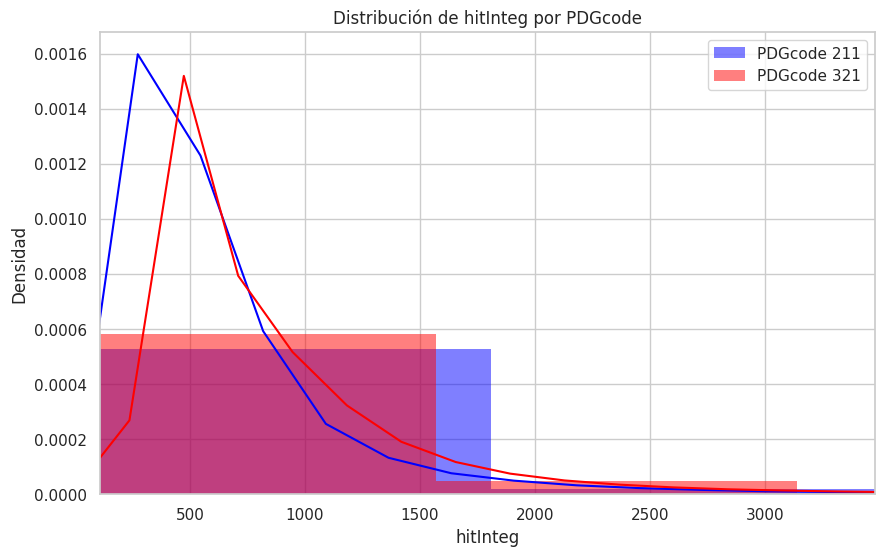

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filtrar el dataframe por PDGcode
df_211 = df_train[df_train['PDGcode'] == 211]
df_321 = df_train[df_train['PDGcode'] == 321]

# Variables a visualizar
variables = ['hitX', 'hitY', 'hitZ', 'hitTime', 'hitInteg']

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear las visualizaciones
for var in variables:
    plt.figure(figsize=(10, 6))

    # Calcular los percentiles 1 y 99 para establecer los límites del eje x
    low_percentile = np.percentile(df_train[var], 1)
    high_percentile = np.percentile(df_train[var], 99)

    # Gráfico para PDGcode = 211
    sns.histplot(df_211[var], color="blue", label="PDGcode 211", kde=True, stat="density", linewidth=0, bins=30)

    # Gráfico para PDGcode = 321
    sns.histplot(df_321[var], color="red", label="PDGcode 321", kde=True, stat="density", linewidth=0, bins=30)

    plt.title(f'Distribución de {var} por PDGcode')
    plt.xlabel(var)
    plt.ylabel('Densidad')

    # Ajustar los límites de los ejes dinámicamente
    plt.xlim(low_percentile, high_percentile)

    plt.legend()
    plt.show()


A continuación comentaremos las distribuciones de los datos en los dataFrame de train. Para ello veremos cada variable por separado. Antes de esto comentaremos que el $PDGcode = 211$ indicaria un pion, en cambio $PDGcode=321$ indicaria un kaon.

> **hitX**: En esta variable pordemos ver como en la parte central, cuando el valor de la variable tiende más a 0, vemos como se concentra una mayor parte de piones, en cambio a medida que se va separando, vamos encontrando más kaones. Esto quiere decir que el hits de los piones se produce más cercano a donde fue lanzada esa particula, en cambio el de los kaones se produce más lejano al punto donde fueron lanzados.

> **hitY**: Para el eje Y pasa lo mismo que en el eje X. Lo que viene a decir lo mismo, los hits de los piones se producen más cercanos al punto donde se produjo el experimento, mientras que a medida que nos vamos separando se encuentran más hits de kaones.

> **hitZ**: En el eje Z tiene un comportamiento distinto. Si el hits se ha producido en el rango de $(-∞,+20)$ hay más probabilidad de que la particula que vamos a predecir sea un kaons y si el hits se produce en el rango $(+20, +∞)$ hay más probabilidad de que sea un pions.

> **hitTime**: Aqui podemos ver como en el rango de $(1600, 1800)$ nanosegundos se producen más hits de piones y en el resto de valores excepto $(1600, 1800)$ se producen más hits de kaones.

> **hitInteg**: En el caso de esta variable vemos como antes de que la magnitud de la variable sea 500 hay una mayor concentración de piones y a partir de 500 se estabilizan la cantidad de piones y kaones a medida que se incrementa el valor de la variable.





Como hemos visto en el valor de las variables hemos detectado un cierto patron en las posiciones de los hits en los ejes de coordenadas X,Y y Z. Por tanto, para ver un ejemplo en el espacio, vamos a representar 300 piones y 300 kaones en el eje de coordenadas, para ver como nuestro modelo pudiera llegar aprender un patrón para poder clasificar ambas variables.

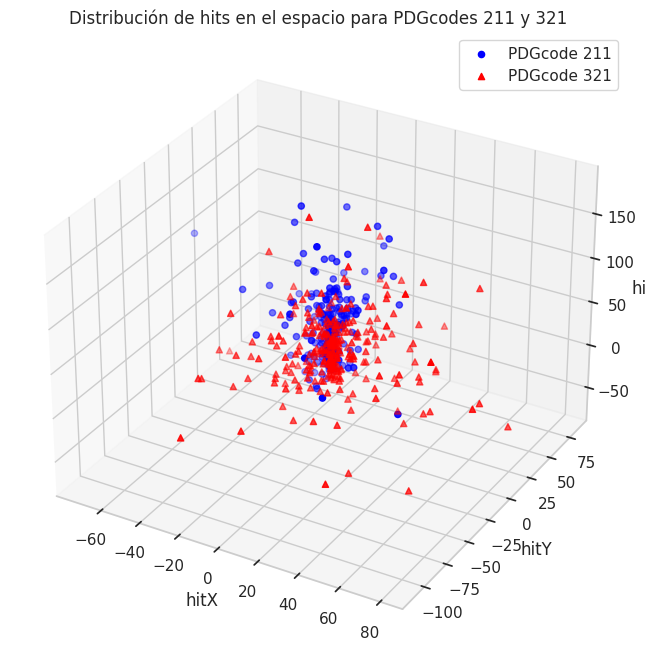

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Tomar 50 muestras aleatorias de cada dataframe
sample_211 = df_211[['hitX', 'hitY', 'hitZ']].sample(n=300, random_state=42)
sample_321 = df_321[['hitX', 'hitY', 'hitZ']].sample(n=300, random_state=42)

# Crear figura para la visualización 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Agregar los puntos de cada muestra al gráfico
ax.scatter(sample_211['hitX'], sample_211['hitY'], sample_211['hitZ'], c='blue', marker='o', label='PDGcode 211')
ax.scatter(sample_321['hitX'], sample_321['hitY'], sample_321['hitZ'], c='red', marker='^', label='PDGcode 321')

# Etiquetas de los ejes
ax.set_xlabel('hitX')
ax.set_ylabel('hitY')
ax.set_zlabel('hitZ')

# Título y leyenda
plt.title('Distribución de hits en el espacio para PDGcodes 211 y 321')
ax.legend()

# Mostrar gráfico
plt.show()


Como podemos ver, las particulas de los piones tienden a estar más agrupadas en el espacio, mientras que las partículas de los kaones tienen un rango más amplio de variación en su distribución espacial.

23001572